https://vgpena.github.io/classifying-tweets-with-keras-and-tensorflow/

En el anterior enlace, tenéis un ejemplo sobre cómo, a partir de tweets con un label específico (un sentimiento, positivo o negativo): 

1. Genera un conjunto de entrenamiento. El conjunto de entrenamiento es formado a partir de tweets completos pasados a un array con un tamaño específico.
2. Ese array (X_train de tamaño N) tiene un label que representa el sentimiento (y_train)
3. Como todas las frases tienen un tamaño N, la entrada de la red neuronal será de tamaño N y la salida de la red será de tamaño 2 usando activación softmax(porque hay dos clases).

Se pide: 

- Realizar un clasificador de reviews para el dataset de IMDB de la carpeta data_exercise/

**Cuando usa la importación "keras.x", reemplázalo por "tensorflow.keras.x"**

In [1]:
# Your code
"""
De
from keras.preprocessing.text import Tokenizer
Usa
from tensorflow.keras.preprocessing.text import Tokenizer
"""
print()

In [1]:
# Your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow import keras
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [2]:
train = pd.read_csv("data_exercise/IMDB Dataset.csv")

In [4]:
X_train = train["review"]
y_train = train["sentiment"]

In [8]:
y_train = y_train.apply(lambda x: 1 if x == "positive" else 0)

In [9]:
y_train.value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

In [10]:
y_train = np.asarray(y_train)

In [12]:
# only work with the 3000 most popular words found in our dataset
max_words = 3000

# create a new Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# feed our tweets to the Tokenizer
tokenizer.fit_on_texts(X_train)

In [13]:
# Tokenizers come with a convenient list of words and IDs
dictionary = tokenizer.word_index
# Let's save this out so we can use it later
with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

In [15]:
def convert_text_to_index_array(text):
    # one really important thing that `text_to_word_sequence` does
    # is make all texts the same length -- in this case, the length
    # of the longest text in the set.
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

allWordIndices = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

In [17]:
# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices = np.asarray(allWordIndices)

# create one-hot matrices out of the indexed tweets
train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')

In [18]:
train_y = keras.utils.to_categorical(y_train, 2)

In [19]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics= ["CategoricalAccuracy"])

In [21]:
hist_model = model.fit(train_x, train_y,
  batch_size=32,
  epochs=5,
  verbose=1,
  validation_split=0.1,
  shuffle=True)

Epoch 1/5
1407/1407 [==============================] - 20s 13ms/step - loss: 0.3286 - categorical_accuracy: 0.8580 - val_loss: 0.2673 - val_categorical_accuracy: 0.8898
Epoch 2/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.2498 - categorical_accuracy: 0.8976 - val_loss: 0.2751 - val_categorical_accuracy: 0.8814
Epoch 3/5
1407/1407 [==============================] - 19s 13ms/step - loss: 0.1982 - categorical_accuracy: 0.9162 - val_loss: 0.2773 - val_categorical_accuracy: 0.8866
Epoch 4/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.1251 - categorical_accuracy: 0.9472 - val_loss: 0.3537 - val_categorical_accuracy: 0.8798
Epoch 5/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0742 - categorical_accuracy: 0.9694 - val_loss: 0.4352 - val_categorical_accuracy: 0.8810


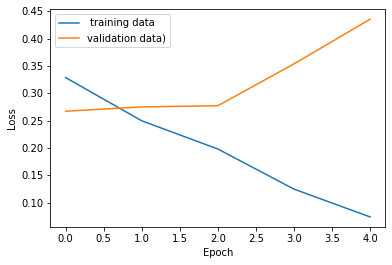

In [22]:
plt.plot(hist_model.history['loss'], label=' training data')
plt.plot(hist_model.history['val_loss'], label='validation data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [23]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')